In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
import os
import cPickle as pickle
from collections import Counter
import pandas
from datetime import datetime
from shutil import copyfile

In [117]:
popularRoot = "/datasets/sagarj/vineData/Dataset/"
recentRoot = "/datasets/sagarj/vine2016/Dataset/"
PostDir = "savedPosts/"
popUserDir = "Users/"
unpopUserDir = "UserProfiles3/"
vidsDir = "Videos/"
tracked = "/postTracking/Day56/"
unpopularDir = "/datasets/sagarj/UnPopular2016_senti/"
unpopVidsDir = unpopularDir + "Videos/"
unpopPostsDir = unpopularDir + "Posts/"
socialFeatures = "../Final_features/postSocialMetaFeatures.pk"


In [125]:
def readJson(path):
    f = open(path)
    data = json.loads(f.read())
    return data

def getPopular():
    popularDir = popularRoot + postDir
    popularPosts = os.listdir(popularDir)
    posts = []
    for post in popularPosts:
        record = readJson(popularDir + post)
        p = record['data']
        if isinstance(p,dict):
            posts.append(p['records'][0])
    return posts

def getUsersPop():
    popularDir = popularRoot + popUserDir
    popularPosts = os.listdir(popularDir)
    userMetaDict = {}
    posts = []
    followers = []
    for post in popularPosts:
        record = readJson(popularDir + post)
        p = record['data']
        if isinstance(p,dict) and p.has_key('followerCount'):
            posts.append(p)
            userId = p['userId']
            flwer= p['followerCount']
            pastPosts = p['authoredPostCount']
            followers.append(p['followerCount'])
            #userMetaDict[userId] = [flwer , pastPosts]
            userMetaDict[userId] = {'follower' : flwer , 'pastPosts': pastPosts}     
    return posts , followers , userMetaDict

def getUsersUnPop():
    popularDir = recentRoot + unpopUserDir
    popularPosts = os.listdir(popularDir)
    posts = []
    followers = []
    userMetaDict = {}
    for post in popularPosts:
        record = readJson(popularDir + post)
        p = record['data']
        if isinstance(p,dict) and p.has_key('followerCount'):
            posts.append(p)
            userId = p['userId']
            flwer = p['followerCount']
            pastPosts = p['authoredPostCount']
            followers.append(p['followerCount'])
            userMetaDict[userId] = {'follower' : flwer , 'pastPosts': pastPosts}          
    return posts , followers , userMetaDict

def getCrawled(root , postDir):
    crawledDir = root + postDir
    crawledPosts = os.listdir(crawledDir)
    print len(crawledPosts)
    posts = []
    postDict = {}
    for post in crawledPosts:
        postid = post.split('.')[0]
        record = readJson(crawledDir + post)
        p = record['data']
        if isinstance(p,dict):
            posts.append(p['records'][0])
            postDict[postid] = p['records'][0]
    print len(postDict.keys())
    return posts , postDict

def getPopMetrics(vineList):
    likes = []
    reposts = []
    loops = []
    timestamps = []
    for vine in vineList:
        likes.append(vine['likes']['count'])
        reposts.append(vine['reposts']['count'])
        loops.append(vine['loops']['count'])
        timestamps.append(datetime.strptime(vine['created'], '%Y-%m-%dT%H:%M:%S.%f'))
    return likes, reposts, loops, timestamps

def copyList(listOfFiles,srcFolder , dstFolder):
    if not os.path.exists(dstFolder):
        os.makedirs(dstFolder)
    for f in listOfFiles:
        src = srcFolder + f
        dst = dstFolder + f
        copyfile(src , dst)
        
    sentiDict = {}
    for line in lines:
        comp = line.split(',')
        sentiDict[comp[0]] = float(comp[1].strip())
    return sentiDict

def readFeatureFile(color_features):
    with open(color_features) as g:
        featureLines = g.readlines()
    print len(featureLines)
    return featureLines


def postFollowerMapping(postsInterested , postDict , userDict ):
    finalMeta = []
    for postId in postsInterested:
        if postId in postDict:
            post = postDict[postId]
            like = post['likes']['count']
            loop = post['loops']['count']
            reposts = post['reposts']['count']
            user = post['userId']
            if user in userDict:
                userMeta = userDict[user]
                logline = [postId,  userMeta['follower'], userMeta['pastPosts'] , loop , like , reposts ]
                finalMeta.append(logline)
    return finalMeta
        
        
            
        
    


In [77]:

recentList , recentDict = getCrawled(recentRoot , postDir )

122326
122298


In [60]:
popularList = getPopular()

In [78]:
trackedList , trackedDict = getCrawled(recentRoot , tracked )

113447
78745


In [79]:
popList , popDict = getCrawled(popularRoot , postDir )

11448
11448


In [80]:
recentLikes , recentReposts, recentLoops , recentTimestamps = getPopMetrics(recentList)

popLikes , popReposts, popLoops , popTimeStamps= getPopMetrics(popularList)

trackedLikes , trackedReposts, trackedLoops , trackedTimeStamps= getPopMetrics(trackedList)

In [81]:
totalPostDict = recentDict.copy()
totalPostDict.update(popDict)
print len(totalPostDict.keys())

133746


In [12]:
Likes = popLikes+ trackedLikes
Reposts = popReposts+ recentReposts

In [13]:
Likes = map(lambda x: 1 if x == 0 else x, Likes)
Reposts = map(lambda x: 1 if x == 0 else x, Reposts)

In [14]:
print np.mean(recentLoops) , np.median(recentLoops) , np.mean(Reposts) , np.median(Reposts)

1879.05072855 10.0 1376.81935908 1.0


In [15]:
sampleL = np.random.choice(len(Likes) , 3000)
sampleR = np.random.choice(len(Reposts) , 3000)

In [16]:
likes = [Likes[i] for i in sampleL]
reposts = [Reposts[i] for i in sampleR]

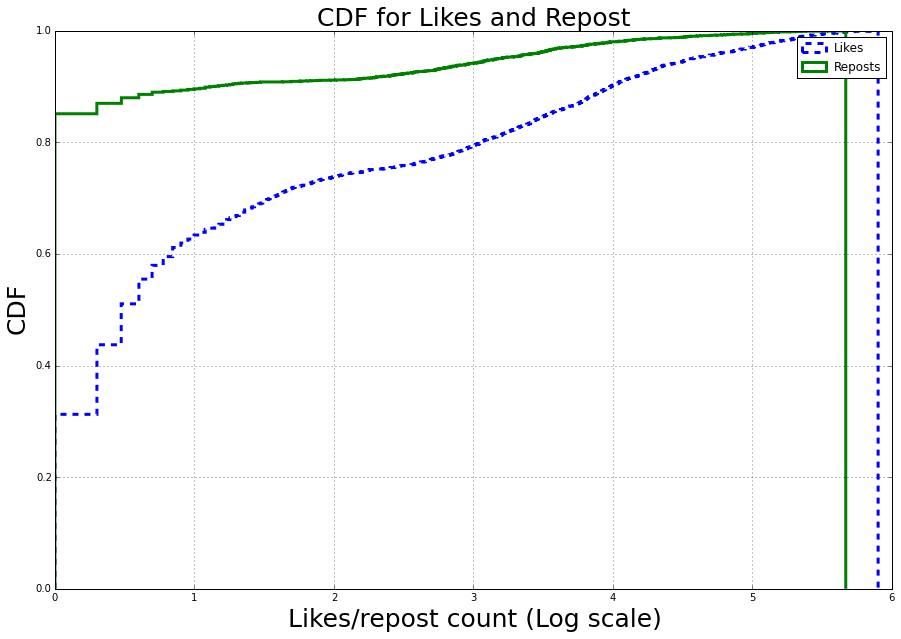

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(np.log10(likes), 2000, normed=1,histtype='step', cumulative=True,linewidth = 3.0,linestyle='dashed')
plt.hist(np.log10(reposts), 1000, normed=1,histtype='step', cumulative=True,linewidth = 3.0)
plt.title("CDF for Likes and Repost", fontsize = 25)
plt.xlabel("Likes/repost count (Log scale)",fontsize = 25)
plt.ylabel("CDF",fontsize = 25)
plt.legend(['Likes' , 'Reposts'])
plt.grid(True)
plt.show()

In [18]:
Top1000 = np.argsort(trackedLoops)[-50:]
trackedTop1000 = [trackedLoops[i] for i in Top1000]
trackedTop1000Posts = [trackedList[i] for i in Top1000]
print len(trackedTop1000)

50


In [19]:
print np.median(trackedTop1000) , np.mean(trackedTop1000) , np.var(trackedTop1000)

2342021.0 2892075.04 3.36588050914e+12


In [20]:
unpopular3000 = np.argsort(trackedLoops)[:12000]
unpop3000loops = [trackedLoops[i] for i in unpopular3000]
unpop3000Posts = [trackedList[i] for i in unpopular3000]

In [21]:
print np.median(unpop3000loops) , np.mean(unpop3000loops) , np.var(unpop3000loops)

20.0 19.4901666667 104.160236639


In [22]:
unpopPostList = []
for p in unpop3000Posts: 
    postid = p['postId']
    filename = str(postid) + ".json"
    unpopPostList.append(filename)

In [23]:
print len(unpopPostList)

12000


In [24]:
srcPosts = "/datasets/sagarj/vine2016/Dataset//postTracking/Day24/"
copyList(unpopPostList, srcPosts , unpopPostsDir)

In [25]:
unpopVidList = []
for p in unpop3000Posts: 
    postid = p['videoUrl'].split('/')[5].split('?')[0]
    filename = str(postid)
    unpopVidList.append(filename)

In [26]:
print unpopVidList[:10]

['230718972B1385776682622914560_SW_WEBM_1473369102179d9822d43ab.mp4', '87FAA1D4B81385258722154414080_14732492335083d6cca748e.mp4.mp4', '77734EC1AC1385821679103909888_SW_WEBM_1473379829506c1dc42b9f1.mp4', 'D6838FE9501385258555023724544_14732491932683cac70e797.mp4.mp4', '24E858886D1385712794485547008_14733574938222ec0971b42.mp4.mp4', '4B511CE79E1385169351682224128_14732279248026e4b67d394.mp4.mp4', '7820DFAF741379823525757677568_147195329286818a307d974.mp4.mp4', '095492C70F1385168079927095296_14732276222460c336a9409.mp4.mp4', '04420FD0D31385827507911225344_SW_WEBM_14733812191934179b10875.mp4', 'C234A25A171385826720753545216_SW_WEBM_1473381031420d8223ebe7e.mp4']


In [27]:
# srcVids = recentRoot + vidsDir
# copyList(unpopVidList, srcVids , unpopVidsDir)

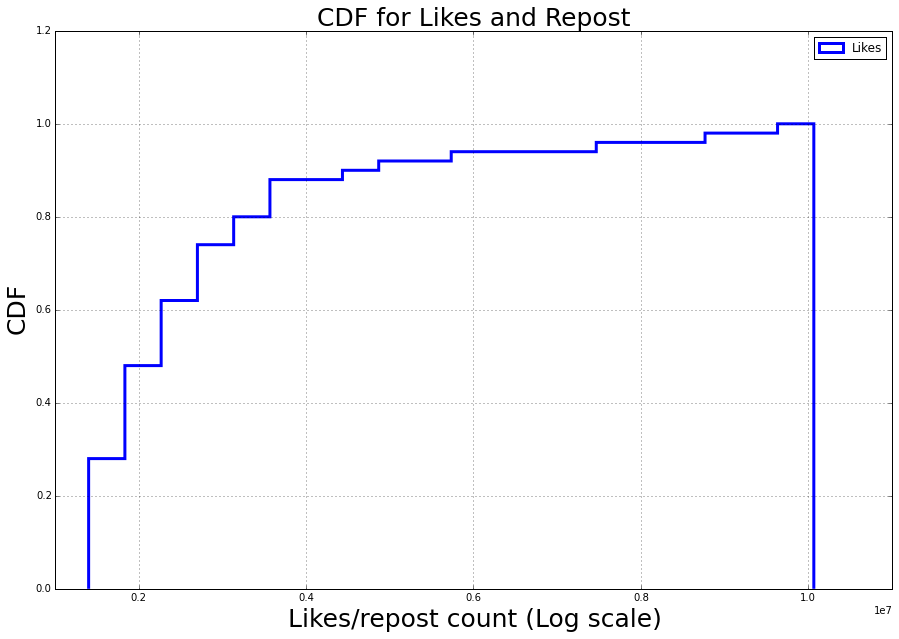

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
#plt.hist(popLikes, 1000, normed=1,histtype='step', cumulative=True,linewidth = 3.0,linestyle='dashed')
#plt.hist(popReposts, 1000, normed=1,histtype='step', cumulative=False,linewidth = 3.0)
plt.hist(trackedTop1000, 20, normed=1,histtype='step', cumulative=True,linewidth = 3.0)
plt.title("CDF for Likes and Repost", fontsize = 25)
plt.xlabel("Likes/repost count (Log scale)",fontsize = 25)
plt.ylabel("CDF",fontsize = 25)
plt.legend(['Likes' , 'Reposts'])
plt.grid(True)
plt.show()

In [29]:
print np.median(popLoops) , np.mean(popLoops) , np.var(popLoops)

318566.0 2405671.25227 4.50174420562e+13


In [30]:
print pow(10,4.5)

31622.7766017


In [103]:
popUsers, popFollowers , popDict = getUsersPop()

In [104]:
print np.mean(popFollowers) , np.median(popFollowers) , len(popFollowers)

366738.428633 40012.0 2319


In [105]:
unpopUsers, unpopFollowers , unpopDict = getUsersUnPop()

In [106]:
userDict = unpopDict.copy()
userDict.update(popDict)

In [99]:
print len(userDict.keys())

36815


In [34]:
print unpopUsers[1]

{u'username': u'twelve', u'twitterScreenname': u'shoyofam', u'followerCount': 14735, u'verified': 0, u'vanityUrls': [u'momotaroumikoshiba'], u'twitterVerified': 0, u'avatarUrl': u'http://v.cdn.vine.co/r/avatars/EF0A9489791397259422337802240_5e40659488f.37.0.jpg?versionId=a67kjdZfjZxcNDIKiAglIE.XfeI4g.LS', u'authoredPostCount': 60, u'shareUrl': u'https://vine.co/momotaroumikoshiba', u'userId': 1140725499174502400, u'location': u'\U0001f498 marmite & chrome \U0001f498', u'profileBackground': u'0x333333', u'likeCount': 8392, u'postCount': 2317, u'loopVelocity': 0.13599999999999998, u'private': 0, u'followingCount': 96, u'secondaryColor': u'0x3E4F57', u'loopCount': 13138238, u'explicitContent': 0, u'description': u'hello !!\nae \nkik: .twelve \n#1 akise aru enthusiast\nfuah | citric \n(I love everything & everything hates me)'}


In [51]:
print np.mean(unpopFollowers) , np.median(unpopFollowers) , len(unpopFollowers)

7088.24899506 80.0 34828


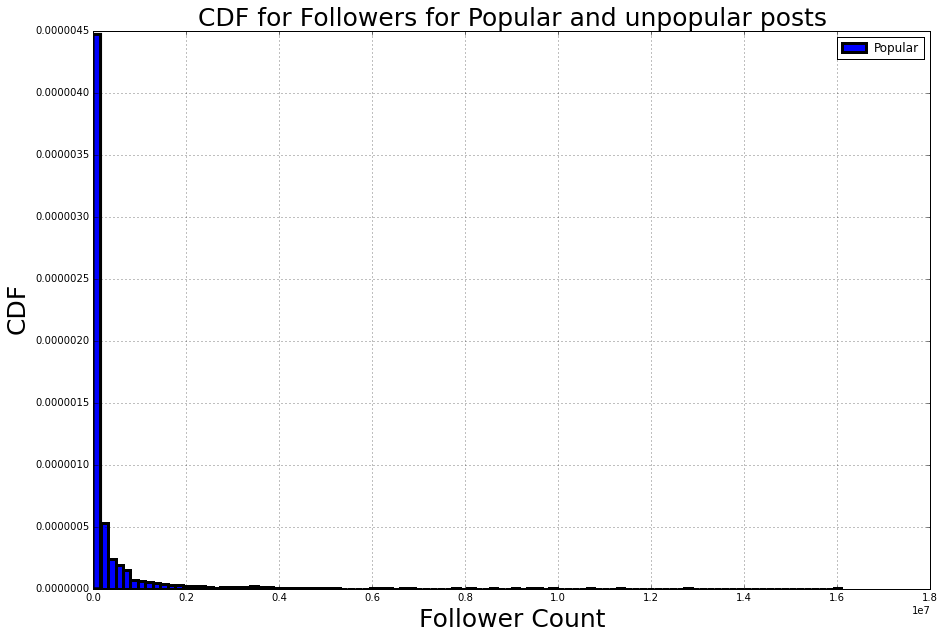

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(popFollowers, 100, normed=1,histtype='bar', cumulative=False,linewidth = 3.0)
#plt.hist(unpopFollowers, 100, normed=1,histtype='step', cumulative=True,linewidth = 3.0)
plt.title("CDF for Followers for Popular and unpopular posts", fontsize = 25)
plt.xlabel("Follower Count",fontsize = 25)
plt.ylabel("CDF",fontsize = 25)
plt.legend(['Popular' , 'Unpopular'])
plt.grid(True)
plt.show()

In [38]:
meanSentiment = "../Final_features/median_sentiments.csv"
senti_csv = readFeatureFile(meanSentiment)

sentiDict = readSentiFeatures(senti_csv)

23441


In [39]:
postIds = sentiDict.keys()
print len(postIds)

23441


In [126]:
postUserMeta = postFollowerMapping(postIds,totalPostDict,userDict)

In [127]:
print len(postUserMeta)

22192


In [128]:
postUserMeta[100]

['1275430531974504448', 71634, 490, 351413.0, 12661, 5233]

In [129]:
f = open(socialFeatures , 'w+')
pickle.dump(postUserMeta , f)
f.close()